##Coursework 2
#**Continuation of the Deep Learning Model for a Binary Classification of Movie Reviews with Updated Methods**

##**Defining the Problem and Assembling the Dataset**
In this investigation, I will be testing whether new methods in the deep learning model can be constructed and tested for the IMDb dataset (text-based film reviews). This testing is to classify whether or not a review is positive or negative. This is a binary classification problem, as stated in the previous works. 

The goal of this report is to verify that there is sufficient data to provide a valid and accurate output from the model by using NEW methods as studied in the DLWP. I will be studying and reporting the relationship between the updated models and the changes made to the model, all while trying to find the best model for the dataset.

##**IMDB Dataset**
The IMDB dataset is a set of 50,000 online movie reviews from the internet movie database. The reviews are split into 25,000 training reviews and 25,000 reviews for testing. This consists of 50% positive reviews and 50% negative reviews. The reason why we separate training sets from the testing set is that it is impractical to test the model on data that has trained it. The models performance will be based on new data which it hasn't seen before, with train_labels and test_labels are lists of 1's and 0's (1 being a positive review and 0 being a negative review).

##**Measure of success and Evaluation of success**
The measure of success for the model will remain as the outputs ( validation accuracy) while being tested. With the classes being balanced, Accuracy is a valid success metric to be used for this Model. To measure the progress, I will be implementing new embedding layers and simple RNN (recurrent neural networks) to see how the model performs. Other alterations to the model may be implemented to see the effects in the hope of an improved model.

##**Preparing Data**
As explained previously, the data will be the IMDb dataset and I will be implementing Deep Learning for text and sequences methods as shown in the DLWP book.

One method which will be used is Word embeddings (dense word vectors). This is a way to associate a vector with a word. This is a different approach to vectorising the data as done in previous models which used one-hot word vectors.
Word embeddings are low dimensional floating-point vectors and unlike word vectors from one hot method, the embeddings are learned from the data. The benefit of word embeddings is that it contains more information in far fewer dimensions than one-hot word vectors. This method will be implemented using simple embedding layers.

Recurrent neural networks. This implementation is a network that remembers the input with memory. This makes it perfect for predicting problems that involve sequential data or data which rely on previous inputs such as a previous word in IMDb. In the case of the IMDb dataset, the RNN has an internal loop that resets between processing two different sequences (two IMDb reviews). The network will internally loop over the elements.

There are other recurrent layers available that I can implement and that is LSTM. These layers are more popular since the "simpleRNN" is considered too simple for real use cases.

Other methods may be implemented to find the best model.

##**Creating the first Model**
In the first model, we must create a model which is at least achieves statistical power. The baseline for IMDb is 0.5 as there are two options for the outcome.
This model will load the IMDb data for use with an embedding layer.

In [ ]:
#Coursework
#importing
from tensorflow.keras.datasets import imdb
from keras import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# number of words to consider as features and the text cut off among the max_features most common words
max_features = 10000
maxlen = 20


# load the data
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = max_features)


# preprocess
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen= maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen= maxlen)



# build model
from keras.models import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Embedding

model = models.Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs = 20,
                    batch_size=512,
                    validation_split = 0.2)

#defining graphs.
def lossGraph(loss, val_loss):
  

  epochs = range(1, len(loss) + 1)
  
  blue_dots = 'bo'
  solid_blue_line = 'b'

  plt.plot(epochs, loss, blue_dots, label = 'Training loss')
  plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def accGraph(acc,val_acc):
  plt.clf()
  
  epochs = range(1, len(acc) + 1)

  
  
  blue_dots = 'bo'
  solid_blue_line = 'b'
    
  plt.plot(epochs, acc, blue_dots, label = 'Training acc')
  plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
  plt.title('Training and validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6919 - accuracy: 0.5252 - val_loss: 0.6904 - val_accuracy: 0.5512
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.6450 - val_loss: 0.6851 - val_accuracy: 0.6018
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.7275 - val_loss: 0.6750 - val_accuracy: 0.6416
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.7714 - val_loss: 0.6593 - val_accuracy: 0.6698
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6252 - accuracy: 0.7897 - val_loss: 0.6388 - val_accuracy: 0.6950
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5950 - accuracy: 0.7982 - val_loss: 0.6157 - val_accuracy: 0.7040
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.8018 - val_loss: 0.5923 - val_accuracy: 0.7126
Epoch 8/20
40/40 [==

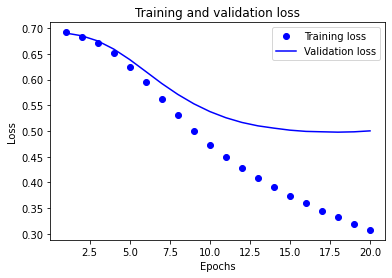

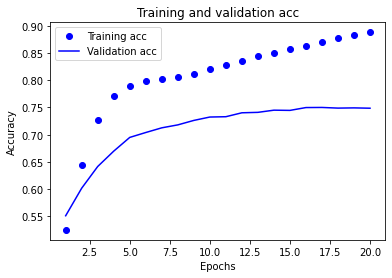

In [ ]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss, val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc, val_acc)

##**Evaluating the Model**

As you can see above, the model does have statistical power over the simple baseline. The validation accuracy is constantly above 0.5 through all epochs. with the highest validation accuracy being on epoch 17 with an accuracy of 0.7500. However, the minimum validation loss was achieved on epoch 18 with 0.4977.
The accuracy increases sharply until epoch 5, where it then begins to level off until epoch 20.

The current optimal epoch is 17.



model | minLoss | maxAcc
------|---------|--------
1     | 0.4977  | 0.7500


##**Trying to Developing a Model that Improves the First**
We must now alter the model to try and improve the current existing model.
We will do this by implementing a simple recurrent neural network and increasing maxlen.

Model 2:

In [ ]:
from tensorflow.keras.datasets import imdb
from keras import preprocessing
import numpy as np
import matplotlib.pyplot as plt

max_features = 10000
maxlen = 500
batch_size= 32
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = max_features)

train_data = preprocessing.sequence.pad_sequences(train_data, maxlen= maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen= maxlen)


from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs = 20,
                    batch_size=32,
                    validation_split = 0.2)



Epoch 1/20
625/625 [==============================] - 65s 103ms/step - loss: 0.5521 - accuracy: 0.6992 - val_loss: 0.3930 - val_accuracy: 0.8284
Epoch 2/20
625/625 [==============================] - 65s 104ms/step - loss: 0.3410 - accuracy: 0.8639 - val_loss: 0.4293 - val_accuracy: 0.8012
Epoch 3/20
625/625 [==============================] - 65s 104ms/step - loss: 0.2858 - accuracy: 0.8880 - val_loss: 0.4140 - val_accuracy: 0.8154
Epoch 4/20
625/625 [==============================] - 65s 104ms/step - loss: 0.2394 - accuracy: 0.9080 - val_loss: 0.3524 - val_accuracy: 0.8566
Epoch 5/20
625/625 [==============================] - 65s 105ms/step - loss: 0.1836 - accuracy: 0.9310 - val_loss: 0.3761 - val_accuracy: 0.8606
Epoch 6/20
625/625 [==============================] - 65s 104ms/step - loss: 0.1519 - accuracy: 0.9430 - val_loss: 0.4513 - val_accuracy: 0.8610
Epoch 7/20
625/625 [==============================] - 65s 104ms/step - loss: 0.1251 - accuracy: 0.9542 - val_loss: 0.4731 - val_ac

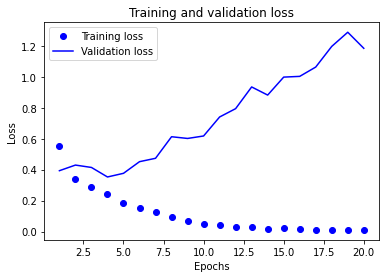

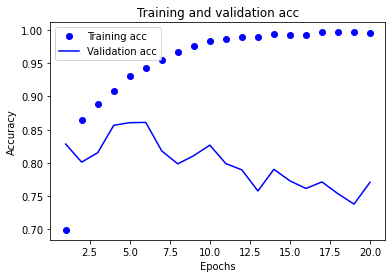

In [ ]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss, val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc, val_acc)

##**Model 2 Evaluation**

As seen in the table, the max accuracy achieved was on epoch 6 with valAcc 0.8610 and a minimum validation loss of 0.3524 on epoch 4. This model is an improvement with the addition of simpleRNN and a change in maxlen and batch size.
With validation loss increasing, there is a clear indication of overfitting occurring. This is what we wanted to achieve with the second model.

As explained in the introduction (preparing data), SimpleRNN doesn't perform very well since the inputs only consider the first 500 words (maxlen) instead of full sequences, thus providing the RNN with less information. Simple RNN isn't good enough for long sequences, such as text.


model | minLoss | maxAcc
------|---------|--------
1     | 0.4977  | 0.7500
2     |0.3524   |0.8610

##**Regularising and tuning**
We will begin to tune the model to try and achieve a best possible model for the data.

##**Model 3**
For model 3, we will introduce Long short-term memory (LSTM) instead of the simpleRNN. This process allows the saving of information (carry over information), hindering older signals from vanishing during processing.

In [ ]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs = 20,
                    batch_size=32,
                    validation_split = 0.2)

Epoch 1/20
625/625 [==============================] - 103s 162ms/step - loss: 0.4280 - accuracy: 0.8075 - val_loss: 0.2899 - val_accuracy: 0.8862
Epoch 2/20
625/625 [==============================] - 101s 162ms/step - loss: 0.2710 - accuracy: 0.8965 - val_loss: 0.2888 - val_accuracy: 0.8894
Epoch 3/20
625/625 [==============================] - 102s 163ms/step - loss: 0.2225 - accuracy: 0.9166 - val_loss: 0.3266 - val_accuracy: 0.8758
Epoch 4/20
625/625 [==============================] - 101s 161ms/step - loss: 0.1962 - accuracy: 0.9276 - val_loss: 0.2799 - val_accuracy: 0.8926
Epoch 5/20
625/625 [==============================] - 101s 161ms/step - loss: 0.1818 - accuracy: 0.9347 - val_loss: 0.2847 - val_accuracy: 0.8786
Epoch 6/20
625/625 [==============================] - 101s 161ms/step - loss: 0.1660 - accuracy: 0.9418 - val_loss: 0.2785 - val_accuracy: 0.8924
Epoch 7/20
625/625 [==============================] - 101s 161ms/step - loss: 0.1546 - accuracy: 0.9445 - val_loss: 0.3245 -

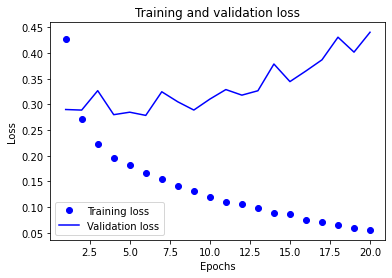

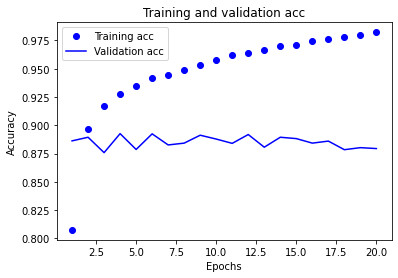

In [ ]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss, val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc, val_acc)

##**Model 3 Evaluation**
From the graphs, we can see that validation loss was steady from epoch 1 to 10. with the lowest validation loss occurring on epoch 6 and the maximum validation accuracy occurring on epoch 4. This model clearly shows that there is an immediate benefit in using LSTM with output dimensionality 32. The validation accuracy was increased drastically, staying above 0.87. 

One thing to note is that all minimum losses and max validation accuracies have occurred in epochs below 10 for both models excluding the baseline model.

model | minLoss | maxAcc
------|---------|--------
1     | 0.4977  | 0.7500
2     |0.3524   |0.8610
3     |0.2785   |0.8926

##**Model 4**
Tuning the output dimentionality of LSTM and increasing dimensional embedding.

In [ ]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs = 20,
                    batch_size=32,
                    validation_split = 0.2)

Epoch 1/20
625/625 [==============================] - 113s 177ms/step - loss: 0.4305 - accuracy: 0.8140 - val_loss: 0.3597 - val_accuracy: 0.8508
Epoch 2/20
625/625 [==============================] - 109s 175ms/step - loss: 0.2729 - accuracy: 0.8946 - val_loss: 0.3465 - val_accuracy: 0.8522
Epoch 3/20
625/625 [==============================] - 112s 180ms/step - loss: 0.2182 - accuracy: 0.9188 - val_loss: 0.2810 - val_accuracy: 0.8926
Epoch 4/20
625/625 [==============================] - 111s 177ms/step - loss: 0.1923 - accuracy: 0.9305 - val_loss: 0.2809 - val_accuracy: 0.8902
Epoch 5/20
625/625 [==============================] - 110s 177ms/step - loss: 0.1731 - accuracy: 0.9395 - val_loss: 0.2885 - val_accuracy: 0.8940
Epoch 6/20
625/625 [==============================] - 110s 176ms/step - loss: 0.1538 - accuracy: 0.9447 - val_loss: 0.2893 - val_accuracy: 0.8930
Epoch 7/20
625/625 [==============================] - 110s 176ms/step - loss: 0.1331 - accuracy: 0.9531 - val_loss: 0.3159 -

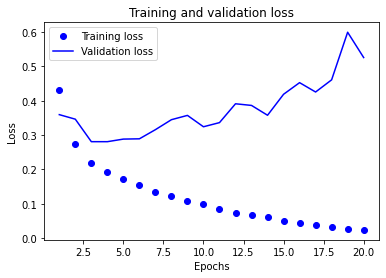

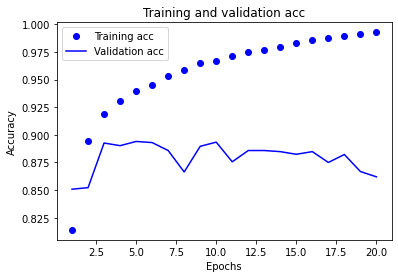

In [ ]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss, val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc, val_acc)

##**Model 4 Evaluation**

The maximum validation accuracy was reached on epoch 5 with 0.8940 and a minimum validation loss of 0.2809 on epoch 4. The model above shows us that the tuning did not achieve anything beneficial to the model as the validation loss increases more than the previous model, although the model achieved a higher accuracy, it performed much worse in regards to loss. This model is more overfitting than others.

model | minLoss | maxAcc
------|---------|--------
1     | 0.4977  | 0.7500
2     |0.3524   |0.8610
3     |0.2785   |0.8926
4     |0.2809   |0.8940

##**Model 5**
Due to model 4s lack of improvement, The output dimensionality will be reveresed and dimensional embedding will be reversed.



In [ ]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs = 20,
                    batch_size=32,
                    validation_split = 0.2)

Epoch 1/20
625/625 [==============================] - 105s 165ms/step - loss: 0.4151 - accuracy: 0.8088 - val_loss: 0.2837 - val_accuracy: 0.8848
Epoch 2/20
625/625 [==============================] - 102s 163ms/step - loss: 0.2639 - accuracy: 0.8970 - val_loss: 0.3666 - val_accuracy: 0.8610
Epoch 3/20
625/625 [==============================] - 103s 165ms/step - loss: 0.2244 - accuracy: 0.9153 - val_loss: 0.2736 - val_accuracy: 0.8906
Epoch 4/20
625/625 [==============================] - 103s 165ms/step - loss: 0.1980 - accuracy: 0.9270 - val_loss: 0.2855 - val_accuracy: 0.8854
Epoch 5/20
625/625 [==============================] - 103s 164ms/step - loss: 0.1832 - accuracy: 0.9348 - val_loss: 0.2848 - val_accuracy: 0.8916
Epoch 6/20
625/625 [==============================] - 103s 164ms/step - loss: 0.1683 - accuracy: 0.9384 - val_loss: 0.4118 - val_accuracy: 0.8580
Epoch 7/20
625/625 [==============================] - 102s 164ms/step - loss: 0.1592 - accuracy: 0.9416 - val_loss: 0.3171 -

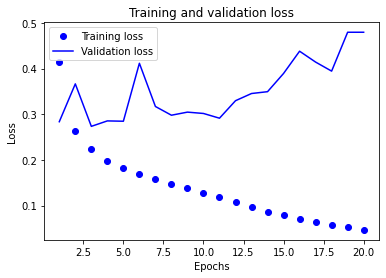

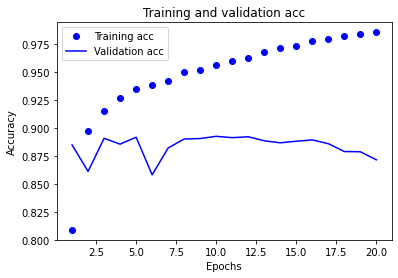

In [ ]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss, val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc, val_acc)

##**Model 5 Evaluation**
As model 4, the changes to the model provided minimal benefit.
the minimum validation loss was achieved on epoch 3 with 0.2736 and achieved a max validation accuracy of 0.8924 on epoch 10. The model is still overfitting for the training data.

model | minLoss | maxAcc
------|---------|--------
1     | 0.4977  | 0.7500
2     |0.3524   |0.8610
3     |0.2785   |0.8926
4     |0.2809   |0.8940
5     |0.2736   |0.8924

The alterations to the model so far have not provided a strong enough model to comare with the original model shown in the first report.

##**Model 6**
for model 6, I will be initiating a bidirectional RNN for an LSTM model.
I will also be including a recurrent dropout regularisation to attempt to counter the fast overfitting which would occur with bidirectional RNN. This is due to the bidirectional having twice as many parameters as a chronological LSTM

Bacth size increase to 500.

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Embedding(max_features,32))
model.add(layers.Bidirectional(layers.LSTM(32,
                                           dropout =0.2,
                                           recurrent_dropout=0.2)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs = 20,
                    batch_size=500,
                    validation_split = 0.2)

Epoch 1/20
40/40 [==============================] - 133s 3s/step - loss: 0.6221 - accuracy: 0.6671 - val_loss: 1.0405 - val_accuracy: 0.5266
Epoch 2/20
40/40 [==============================] - 124s 3s/step - loss: 0.4233 - accuracy: 0.8208 - val_loss: 0.3787 - val_accuracy: 0.8326
Epoch 3/20
40/40 [==============================] - 124s 3s/step - loss: 0.3040 - accuracy: 0.8772 - val_loss: 0.2976 - val_accuracy: 0.8786
Epoch 4/20
40/40 [==============================] - 122s 3s/step - loss: 0.2564 - accuracy: 0.8985 - val_loss: 0.2803 - val_accuracy: 0.8850
Epoch 5/20
40/40 [==============================] - 122s 3s/step - loss: 0.2323 - accuracy: 0.9097 - val_loss: 0.2878 - val_accuracy: 0.8870
Epoch 6/20
40/40 [==============================] - 127s 3s/step - loss: 0.2114 - accuracy: 0.9189 - val_loss: 0.3138 - val_accuracy: 0.8952
Epoch 7/20
40/40 [==============================] - 123s 3s/step - loss: 0.1915 - accuracy: 0.9291 - val_loss: 0.2948 - val_accuracy: 0.8954
Epoch 8/20
40

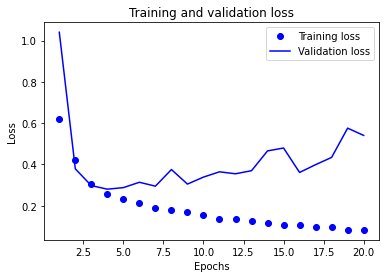

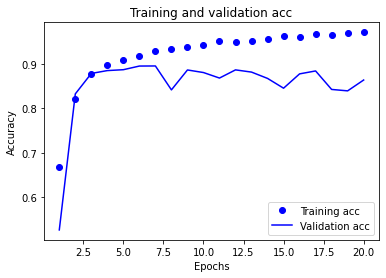

In [ ]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss, val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc, val_acc)

##**Model 6 Evaluation**
As seen in the graphs, there is an elimination of overfitting until epoch 8, where the validation loss then consistently increases to overfit.
The minimum validation loss was achieved on epoch 4 with a loss of 0.2803 and a max validation accuracy of 0.8954 achieved on epoch 7. This has been the most effective model in eliminating overfitting partially.

This model has also produced the highest level of accuracy achieved in any test (including the first report).

model | minLoss | maxAcc
------|---------|--------
1     | 0.4977  | 0.7500
2     |0.3524   |0.8610
3     |0.2785   |0.8926
4     |0.2809   |0.8940
5     |0.2736   |0.8924
6     |0.2803   |0.8954

##**Final Model**
For the final model, i will be implementing model 6 with an optimal epoch of 9.

In [ ]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(layers.Bidirectional(layers.LSTM(32,
                                           dropout =0.2,
                                           recurrent_dropout=0.2)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs = 9,
                    batch_size=500,
                    validation_split = 0.2)

Epoch 1/9
40/40 [==============================] - 131s 3s/step - loss: 0.6621 - accuracy: 0.6453 - val_loss: 0.5014 - val_accuracy: 0.8028
Epoch 2/9
40/40 [==============================] - 125s 3s/step - loss: 0.4165 - accuracy: 0.8220 - val_loss: 0.4438 - val_accuracy: 0.7846
Epoch 3/9
40/40 [==============================] - 125s 3s/step - loss: 0.3039 - accuracy: 0.8770 - val_loss: 0.4154 - val_accuracy: 0.8102
Epoch 4/9
40/40 [==============================] - 125s 3s/step - loss: 0.2644 - accuracy: 0.8942 - val_loss: 0.3143 - val_accuracy: 0.8744
Epoch 5/9
40/40 [==============================] - 125s 3s/step - loss: 0.2246 - accuracy: 0.9125 - val_loss: 0.3527 - val_accuracy: 0.8668
Epoch 6/9
40/40 [==============================] - 125s 3s/step - loss: 0.2057 - accuracy: 0.9221 - val_loss: 0.3661 - val_accuracy: 0.8694
Epoch 7/9
40/40 [==============================] - 127s 3s/step - loss: 0.1904 - accuracy: 0.9277 - val_loss: 0.3002 - val_accuracy: 0.8930
Epoch 8/9
40/40 [===

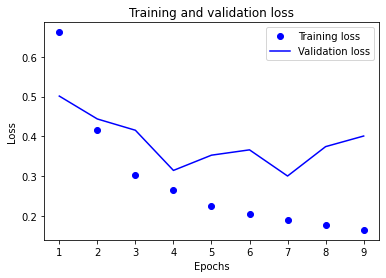

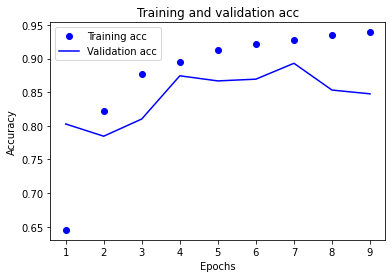

In [ ]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss, val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc, val_acc)

##**Final Evaluation**
The final results show that there is no degradation in the performance with 9 epochs (however there was slight overfitting in the final epoch).
The final model achieved a maximum accuracy of 89.3% for predicting the data.

model|minLoss|maxAcc
-----|-------|------
final|0.3002 |0.8930

##**Conclusion**

When considering the problem and the goals stated in the introduction, The model does provide a valid and accurate output by using the new techniques found in the DLWP book. I studied and reported any significant changes to the results and believe to have found my optimal model in regards to the current outputs I have received in this report.

However, there are some important things to note. 

One of the issues I experienced was the epoch runtimes. As I used more complex techniques, the time taken to complete a full training increased exponentially which harmed any form of lengthy model tuning. Model tuning was achieved however it was not to my standards due to the extremely long runtimes.

Another issue I came by was the fact that I was not producing better results with the new and more complex methods to tuning the model compared to the naive approach from report one. Both results achieved an 89% validation accuracy, with the first approach achieving a model that does not overfit for 20 epochs.

I believe that the techniques used to create a better model for the IMDb dataset are better used in more complex problems rather than a simple one. This could be why RNNs like LSTM didn't provide a large improvement to the model. simplicity might be the issue in the case of the IMDb dataset. As the DLWP book states, methods such as LSTM are better suited for question answering and machine translation problems.

As always with any statistical review, having more data to test is always a consideration as it would provide us with a more accurate result.

##**References**

Blackwell,T., 2021, AI Module videos and Lecture notes, Goldsmiths
CHOLLET,F.,2018, Deep Learning With Python, Manning Publications
Code was a mixture of DLWP code, code from Blackwell,T and code from myself.